In [153]:
import pandas as pd
import random
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture
from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

%matplotlib inline

In [2]:
data_file = "data-final.csv"
df = pd.read_csv(data_file, sep="\t")


In [3]:
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


In [4]:
list(df.columns)

['EXT1',
 'EXT2',
 'EXT3',
 'EXT4',
 'EXT5',
 'EXT6',
 'EXT7',
 'EXT8',
 'EXT9',
 'EXT10',
 'EST1',
 'EST2',
 'EST3',
 'EST4',
 'EST5',
 'EST6',
 'EST7',
 'EST8',
 'EST9',
 'EST10',
 'AGR1',
 'AGR2',
 'AGR3',
 'AGR4',
 'AGR5',
 'AGR6',
 'AGR7',
 'AGR8',
 'AGR9',
 'AGR10',
 'CSN1',
 'CSN2',
 'CSN3',
 'CSN4',
 'CSN5',
 'CSN6',
 'CSN7',
 'CSN8',
 'CSN9',
 'CSN10',
 'OPN1',
 'OPN2',
 'OPN3',
 'OPN4',
 'OPN5',
 'OPN6',
 'OPN7',
 'OPN8',
 'OPN9',
 'OPN10',
 'EXT1_E',
 'EXT2_E',
 'EXT3_E',
 'EXT4_E',
 'EXT5_E',
 'EXT6_E',
 'EXT7_E',
 'EXT8_E',
 'EXT9_E',
 'EXT10_E',
 'EST1_E',
 'EST2_E',
 'EST3_E',
 'EST4_E',
 'EST5_E',
 'EST6_E',
 'EST7_E',
 'EST8_E',
 'EST9_E',
 'EST10_E',
 'AGR1_E',
 'AGR2_E',
 'AGR3_E',
 'AGR4_E',
 'AGR5_E',
 'AGR6_E',
 'AGR7_E',
 'AGR8_E',
 'AGR9_E',
 'AGR10_E',
 'CSN1_E',
 'CSN2_E',
 'CSN3_E',
 'CSN4_E',
 'CSN5_E',
 'CSN6_E',
 'CSN7_E',
 'CSN8_E',
 'CSN9_E',
 'CSN10_E',
 'OPN1_E',
 'OPN2_E',
 'OPN3_E',
 'OPN4_E',
 'OPN5_E',
 'OPN6_E',
 'OPN7_E',
 'OPN8_E',
 'OPN9_E',
 '

# prediction

https://scikit-learn.org/stable/modules/generated/sklearn.mixture.BayesianGaussianMixture.html#sklearn.mixture.BayesianGaussianMixture

In [114]:
df_q = df.iloc[:, :50]
df_q.shape

(1015341, 50)

In [115]:
df_q_clean = df_q.dropna()
df_q_clean.shape

(1013558, 50)

In [156]:
random.seed(1)
X = np.array(df_q_clean.sample(frac=.01))
X.shape

(10136, 50)

In [157]:
n_components = 5
dpgmm = mixture.BayesianGaussianMixture(n_components,
                                        covariance_type='full',
                                        max_iter=1000,).fit(X)

In [158]:
preds = dpgmm.predict(X)


## 2d PCA

In [159]:
pca = PCA(n_components=2)
pca_results = pca.fit(X).transform(X)
pca_df = pd.DataFrame(data = pca_results,
                           columns = ['principal component 1', 'principal component 2'])
pca_df['cluster'] = preds
final_df = pca_df
final_df.head()

,principal component 1,principal component 2,cluster
0,-4.946480,-0.379195,2
1,-4.128173,2.670874,1
2,3.255423,1.013150,4
3,1.902905,-3.193570,4
4,-3.130441,1.455149,1


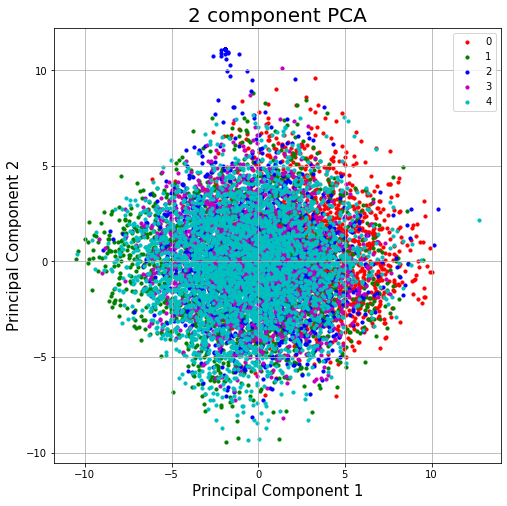

In [160]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [(i) for i in range(n_components)]
colors = ['r', 'g', 'b', 'm', 'c'][:n_components]
for target, color in zip(targets,colors):
    cluster_df = final_df[final_df['cluster'] == target]
    ax.scatter(cluster_df['principal component 1']
               , cluster_df['principal component 2']
               , c = color
               , s = 10)
ax.legend(targets)
ax.grid()

## 3d PCA

In [161]:
pca = PCA(n_components=3)
pca_results = pca.fit(X).transform(X)
pca_df = pd.DataFrame(data = pca_results,
                           columns = ['principal component 1', 'principal component 2', 'principal component 3'])
pca_df['cluster'] = preds
final_df = pca_df
final_df.head()

,principal component 1,principal component 2,principal component 3,cluster
0,-4.946480,-0.379195,-1.226250,2
1,-4.128173,2.670874,-2.175487,1
2,3.255423,1.013150,-1.167689,4
3,1.902905,-3.193570,0.807461,4
4,-3.130441,1.455149,-0.063293,1


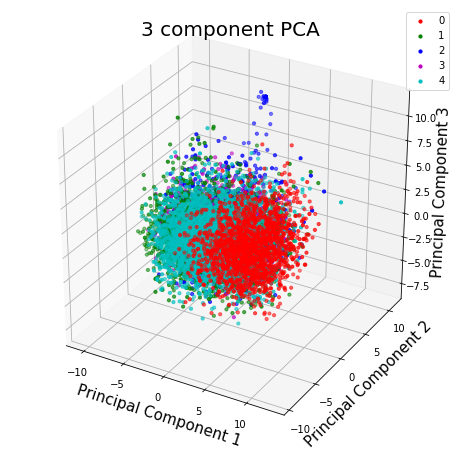

In [162]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d') 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)
targets = [(i) for i in range(n_components)]
colors = ['r', 'g', 'b', 'm', 'c'][:n_components]
for target, color in zip(targets,colors):
    cluster_df = final_df[final_df['cluster'] == target]
    ax.scatter(cluster_df['principal component 1']
               , cluster_df['principal component 2']
               , cluster_df['principal component 3']
               , c = color
               , s = 10)
ax.legend(targets)
ax.grid()

(array([1676.,    0., 1898.,    0.,    0., 1554.,    0., 1703.,    0.,
        3305.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

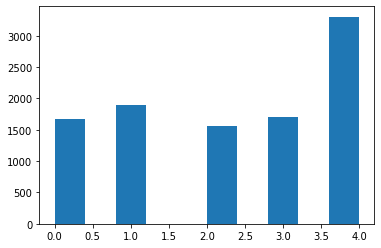

In [163]:
plt.hist(preds)